![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

# Tópicos da Aula de Hoje

- Introdução aos Datasets
- Exploração dos Dados
- Pré-Processamento de Dados
- Plotagem de Gráficos
- Atividade Prática

**Bora pra aula?**

# Introdução aos Datasets

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## O que são?

Datasets são conjuntos de dados que representam informações coletadas ou organizadas de alguma forma.

Eles desempenham um papel fundamental na análise de dados, permitindo aos analistas extrair insights, identificar padrões e tomar decisões informadas com base nos dados.

## Exemplos

Existem muitas fontes de datasets disponíveis gratuitamente na internet, incluindo repositórios como o UCI Machine Learning Repository, Kaggle e muitos outros.

Exemplos comuns incluem conjuntos de dados sobre vendas, clima, saúde, educação, entre outros.

**Alguns links úteis**
- https://www.kaggle.com
- https://github.com/awesomedata/awesome-public-datasets
- https://ourworldindata.org
- https://datasetsearch.research.google.com
- https://data.worldbank.org
- https://archive.ics.uci.edu/datasets

# Exploração dos Dados

In [25]:
# Carregando os dados
nyc_sales = pd.read_csv('nyc-rolling-sales_twentieth.csv')

In [26]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
nyc_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


A primeira coisa que observamos é a coluna ```Unnamed: 0```. Devemos removê-la, já que nem nome ela possui. Essa coluna surge geralmente devido a gravação do índice do dataframe como coluna do csv. Se quisermos evitar que um índice de dataframe seja salvo após nossa análise, passamos o parâmetro ```index=False``` para o método ```.to_csv()```.

In [ ]:
nyc_sales.drop(columns=['Unnamed: 0'], inplace=True)

No Link abaixo podemos ver um pouco da descrição dos dados.<br>
<a href="https://www.kaggle.com/new-york-city/nyc-property-sales"> Descrição dos Dados</a>

In [ ]:
nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         16909 non-null  int64 
 1   NEIGHBORHOOD                    16909 non-null  object
 2   BUILDING CLASS CATEGORY         16909 non-null  object
 3   TAX CLASS AT PRESENT            16909 non-null  object
 4   BLOCK                           16909 non-null  int64 
 5   LOT                             16909 non-null  int64 
 6   EASE-MENT                       16909 non-null  object
 7   BUILDING CLASS AT PRESENT       16909 non-null  object
 8   ADDRESS                         16909 non-null  object
 9   APARTMENT NUMBER                16909 non-null  object
 10  ZIP CODE                        16909 non-null  int64 
 11  RESIDENTIAL UNITS               16909 non-null  int64 
 12  COMMERCIAL UNITS                16909 non-null

In [ ]:
nyc_sales.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [ ]:
nyc_sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,16909.0,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000
mean,1.0,1059.997220,763.994382,9905.031285,2.240641,0.319061,2.604885,1701.808504,2.138743
std,0.0,516.578133,900.247246,1114.133314,22.632717,6.797024,23.764499,655.670715,0.563693
min,1.0,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,720.000000,29.000000,10012.000000,0.000000,0.000000,0.000000,1910.000000,2.000000
50%,1.0,1137.000000,1007.000000,10021.000000,0.000000,0.000000,1.000000,1940.000000,2.000000
75%,1.0,1430.000000,1213.000000,10028.000000,1.000000,0.000000,1.000000,1978.000000,2.000000
max,1.0,2250.000000,9106.000000,10463.000000,1641.000000,422.000000,1653.000000,2017.000000,4.000000


# Pré-Processamento de Dados

## Investigação e Definição de Tipos

Algumas variáveis que são do tipo numérico estão representadas como ```object```:
* ```SALE PRICE```
* ```GROSS SQUARE FEET```
* ```LAND SQUARE FEET```
* ```APARTMENT NUMBER```

Da mesma maneira temos variáveis categóricas que estão como ```int64```:
* ```BOROUGH```
* ```BLOCK```
* ```LOT```
* ```TAX CLASS AT TIME OF SALE```

Inclusive, a própria descrição das variáveis nos revela que podemos utilizar BLOCK da seguinte maneira: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

Vamos tentar algumas conversões? Para isso iremos tentar as conversões através do método ```.astype()```

In [ ]:
nyc_sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
# object to float
nyc_sales['SALE PRICE'] = nyc_sales['SALE PRICE'].astype('float32')
# errors = ignore garantem que se tiver algum missing, mesmo assim será convertido

ValueError: could not convert string to float: ' -  '

In [ ]:
nyc_sales['SALE PRICE']

0        6625000
1            -  
2            -  
3        3936272
4        8000000
          ...   
16904        -  
16905     712500
16906     740000
16907    1800000
16908        -  
Name: SALE PRICE, Length: 16909, dtype: object

Não houve conversão, pois existe um ```-``` no meio das colunas. Isso é um indício de que valores faltosos são representados dessa maneira no nosso dataframe.

Vamos usar outro método: ```pd.to_nummeric```.

In [ ]:
nyc_sales['SALE PRICE'] = pd.to_numeric(nyc_sales['SALE PRICE'], errors='coerce')
nyc_sales['SALE PRICE']

0        6625000.0
1              NaN
2              NaN
3        3936272.0
4        8000000.0
           ...    
16904          NaN
16905     712500.0
16906     740000.0
16907    1800000.0
16908          NaN
Name: SALE PRICE, Length: 16909, dtype: float64

In [ ]:
for coluna in ['SALE PRICE', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'APARTMENT NUMBER']:
    nyc_sales[coluna] = pd.to_numeric(nyc_sales[coluna], errors='coerce')

In [ ]:
nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         16909 non-null  int64  
 1   NEIGHBORHOOD                    16909 non-null  object 
 2   BUILDING CLASS CATEGORY         16909 non-null  object 
 3   TAX CLASS AT PRESENT            16909 non-null  object 
 4   BLOCK                           16909 non-null  int64  
 5   LOT                             16909 non-null  int64  
 6   EASE-MENT                       16909 non-null  object 
 7   BUILDING CLASS AT PRESENT       16909 non-null  object 
 8   ADDRESS                         16909 non-null  object 
 9   APARTMENT NUMBER                1156 non-null   float64
 10  ZIP CODE                        16909 non-null  int64  
 11  RESIDENTIAL UNITS               16909 non-null  int64  
 12  COMMERCIAL UNITS                

Perceba que agora aparecem valores Null no nosso dataframe.

As variáveis categóricas que estão como inteiro iremos converter para ```object```.

In [ ]:
for coluna in ['BLOCK', 'LOT', 'TAX CLASS AT TIME OF SALE' ]:
    nyc_sales[coluna] =  nyc_sales[coluna].astype('object')

Para as variável BOROUGH, vamos seguir as recomendações da "documentação"


In [ ]:
# Podemos usar a função map
#Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
# Como substituir?
%time
nyc_sales['BOROUGH'].replace([1, 2, 3, 4, 5], ['Manhatan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


0        Manhatan
1        Manhatan
2        Manhatan
3        Manhatan
4        Manhatan
           ...   
16904    Manhatan
16905    Manhatan
16906    Manhatan
16907    Manhatan
16908    Manhatan
Name: BOROUGH, Length: 16909, dtype: object

In [ ]:
%time
nyc_sales['BOROUGH'].replace( {1:'Manhatan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


0        Manhatan
1        Manhatan
2        Manhatan
3        Manhatan
4        Manhatan
           ...   
16904    Manhatan
16905    Manhatan
16906    Manhatan
16907    Manhatan
16908    Manhatan
Name: BOROUGH, Length: 16909, dtype: object

In [ ]:
%time
nyc_sales['BOROUGH'] = nyc_sales['BOROUGH'].map({1:'Manhatan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [ ]:
nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         16909 non-null  object 
 1   NEIGHBORHOOD                    16909 non-null  object 
 2   BUILDING CLASS CATEGORY         16909 non-null  object 
 3   TAX CLASS AT PRESENT            16909 non-null  object 
 4   BLOCK                           16909 non-null  object 
 5   LOT                             16909 non-null  object 
 6   EASE-MENT                       16909 non-null  object 
 7   BUILDING CLASS AT PRESENT       16909 non-null  object 
 8   ADDRESS                         16909 non-null  object 
 9   APARTMENT NUMBER                1156 non-null   float64
 10  ZIP CODE                        16909 non-null  int64  
 11  RESIDENTIAL UNITS               16909 non-null  int64  
 12  COMMERCIAL UNITS                

Por fim, temos a coluna ```SALE DATE``` que é uma data, mas que está como string. Vamos convertê-la para data usando a função ```pd.to_datetime```

In [ ]:
nyc_sales['SALE DATE'] = pd.to_datetime(nyc_sales['SALE DATE'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         16909 non-null  object        
 1   NEIGHBORHOOD                    16909 non-null  object        
 2   BUILDING CLASS CATEGORY         16909 non-null  object        
 3   TAX CLASS AT PRESENT            16909 non-null  object        
 4   BLOCK                           16909 non-null  object        
 5   LOT                             16909 non-null  object        
 6   EASE-MENT                       16909 non-null  object        
 7   BUILDING CLASS AT PRESENT       16909 non-null  object        
 8   ADDRESS                         16909 non-null  object        
 9   APARTMENT NUMBER                1156 non-null   float64       
 10  ZIP CODE                        16909 non-null  int64         
 11  RE

In [ ]:
nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [ ]:
nyc_sales.iloc[0, 20] < pd.to_datetime('2020-03-12', format='%Y-%m-%d %H:%M:%S')

ValueError: time data "2020-03-12" doesn't match format "%Y-%m-%d %H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
pd.to_datetime('2020-03-12', format='%Y-%m-%d')

Timestamp('2020-03-12 00:00:00')

## E inconsistências com valores númericos usando notação brasileira?

Exemplo: vírgula para separar a casa decimal e ponto para milhar

In [ ]:
df = pd.DataFrame(data=['1.000,56', '0,34', '1.000.000,00' ], columns=['Valor'])

In [ ]:
df.head()

,Valor
0,"1.000,56"
1,"0,34"
2,"1.000.000,00"


In [ ]:
df.to_csv('teste.csv', index=False)

In [ ]:
df = pd.read_csv('teste.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Valor   3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [ ]:
df = pd.read_csv('teste.csv', thousands='.', decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Valor   3 non-null      float64
dtypes: float64(1)
memory usage: 152.0 bytes


In [ ]:
df.head()

,Valor
0,1000.56
1,0.34
2,1000000.00


## Investigação de Inconsistências

* Datas fora do range
* Valores zerados de feet² ou preço de venda
* Valores negativos de preço ou feet²

In [ ]:
# Checando se há datas maiores que hoje
(nyc_sales['SALE DATE'] > '2020-03-12').sum()

0

In [ ]:
# Checando se há SALE PRICE <= 0
(nyc_sales['SALE PRICE'] <= 0).sum()

0

In [ ]:
# Checando as outras colunas
for coluna in ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']:

    if (nyc_sales[coluna] <= 0).sum() > 0:
        print(f'{coluna} com registros inconsistentes')
    else:
        print(f'{coluna} OK')

SALE PRICE OK
LAND SQUARE FEET OK
GROSS SQUARE FEET OK


## Dados faltosos

Os dados faltosos podem ter diversas origens:
* Erros de inserção (erro em banco)
* Erros humanos
* Erros de medição (sensores)
* Falhas em Equipamentos

Além disso, eles podem ser classificados da seguinte forma
* Missing Completely At Random (MCAR): Os dados não tem relação nenhuma com qualquer dado do dataset. Ou seja, a probabilidade do dado faltoso existir não está associada a ausência ou presença de uma outra informação ou do próprio valor da coluna.
* Missing At Random (MAR): A probabilide de um valor faltoso ocorrer está associada a outra informação do dataset.
* Missing Not at Random (MNAR): Os dados faltosos tem a ver com o próprio valor.

**Tratamento**

Quando um dado faltoso surge por meio de um join numa tabela, quase sempre conseguimos preencher o dado faltoso com um valor que faz sentido.
Ex.: Saque de conta. Nem todos os clientes fazem saque em um mês. Dessa forma, podemos preencher o valor faltoso na coluna de saque para um cliente que não realizou saque como 0.

Quase nunca a opção de deletar tudo é a melhor, pois podem surgir alguns problemas, como:
* Introdução de viés
* Perda de informação

Alguns métodos de tratamento de dados faltosos:
* Deleção
* Preenchimento com estatísticas (moda para categóricos, mediana ou média para numéricos)
* Preenchimento por meio de um modelo (KNN, Árvore de Decisão)
* Preenchimento com regra de negócio

In [ ]:
# Soma por meio das colunas
nyc_sales.isnull().sum()/len(nyc_sales)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.000000
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         0.000000
BUILDING CLASS AT PRESENT         0.000000
ADDRESS                           0.000000
APARTMENT NUMBER                  0.931634
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.897628
GROSS SQUARE FEET                 0.904134
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.207818
SALE DATE                         0.000000
dtype: float64

In [ ]:
df = pd.DataFrame(data= [ [np.nan, 1, 2, np.nan, 5], [6, 7, 8, 9, np.nan ], [np.nan, np.nan, 4, 11, 12 ]   ], columns=['A', 'B', 'C', 'D', 'E'] )
df.head()

,A,B,C,D,E
0,NaN,1.0,2,NaN,5.0
1,6.0,7.0,8,9.0,NaN
2,NaN,NaN,4,11.0,12.0


In [ ]:
df.dropna(thresh=2, axis=1)

,B,C,D,E
0,1.0,2,NaN,5.0
1,7.0,8,9.0,NaN
2,NaN,4,11.0,12.0


In [ ]:
porcentagem = 60
df.dropna(thresh=porcentagem*(len(df)/100), axis=1)

,B,C,D,E
0,1.0,2,NaN,5.0
1,7.0,8,9.0,NaN
2,NaN,4,11.0,12.0


In [ ]:
porcentagem*(len(df)/100)

1.7999999999999998

In [ ]:
df.head()

,A,B,C,D,E
0,NaN,1.0,2,NaN,5.0
1,6.0,7.0,8,9.0,NaN
2,NaN,NaN,4,11.0,12.0


In [ ]:
df.fillna(0)

,A,B,C,D,E
0,0.0,1.0,2,0.0,5.0
1,6.0,7.0,8,9.0,0.0
2,0.0,0.0,4,11.0,12.0


In [ ]:
df.fillna({'A':np.mean(df['A']), 'B':0 })

,A,B,C,D,E
0,6.0,1.0,2,NaN,5.0
1,6.0,7.0,8,9.0,NaN
2,6.0,0.0,4,11.0,12.0


Algumas boas práticas:
* Criar Null Categórico para a coluna (funciona para numéricas e categóricas)
* Não fazer dropna de cara.

Opções de Tratamento:
* Deletar as colunas Land Square Feet, Gross Square Feet e Apartment Number e acrescentar uma coluna Null Categórica.
* Manter a coluna e categorizar (faixas de valores), acrescentando o Null Categórico

In [ ]:
nyc_sales['IS_NULL_APARTMENT_NUMBER'] = False
# como setar os valores?
nyc_sales.loc[ nyc_sales['APARTMENT NUMBER'].isnull(),  'IS_NULL_APARTMENT_NUMBER'] = True

In [ ]:
nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,IS_NULL_APARTMENT_NUMBER
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,True
1,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,NaN,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,True
2,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,NaN,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,True
3,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,NaN,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,True
4,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,NaN,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,True


Vamos criar uma coluna com faixa de valores e o null categórico, usando a função ```pd.cut```

In [ ]:
nyc_sales.describe()

,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,1156.000000,16909.000000,16909.000000,16909.000000,16909.000000,1731.000000,1.621000e+03,16909.000000,1.339500e+04,16909
mean,1796.000144,9905.031285,2.240641,0.319061,2.604885,5531.335644,3.674074e+04,1701.808504,3.444463e+06,2017-03-01 00:01:21.755278080
min,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,2.250000e+02,0.000000,1.000000e+00,2016-09-01 00:00:00
25%,153.750000,10012.000000,0.000000,0.000000,0.000000,1851.000000,4.120000e+03,1910.000000,6.750000e+05,2016-12-01 00:00:00
50%,531.000000,10021.000000,0.000000,0.000000,1.000000,2498.000000,8.120000e+03,1940.000000,1.190000e+06,2017-03-01 00:00:00
75%,1016.000000,10028.000000,1.000000,0.000000,1.000000,4837.000000,1.959000e+04,1978.000000,2.517495e+06,2017-06-01 00:00:00
max,52931.000000,10463.000000,1641.000000,422.000000,1653.000000,364000.000000,2.155492e+06,2017.000000,2.210000e+09,2017-08-31 00:00:00
std,6287.276248,1114.133314,22.632717,6.797024,23.764499,16603.474685,1.208199e+05,655.670715,2.497726e+07,NaN


In [ ]:
# Pega o máximo e o mínimo da coluna e constrói intervalos igualmente espaçados
nyc_sales['LAND SQUARE FEET FAIXA'] = pd.cut(nyc_sales['LAND SQUARE FEET'].values, bins=5)
# Convertendo para object
nyc_sales['LAND SQUARE FEET FAIXA'] = nyc_sales['LAND SQUARE FEET FAIXA'].astype('object')

In [ ]:
nyc_sales['LAND SQUARE FEET FAIXA']

0        (-275.912, 72870.4]
1        (-275.912, 72870.4]
2        (-275.912, 72870.4]
3        (-275.912, 72870.4]
4        (-275.912, 72870.4]
                ...         
16904                    NaN
16905                    NaN
16906                    NaN
16907                    NaN
16908                    NaN
Name: LAND SQUARE FEET FAIXA, Length: 16909, dtype: object

In [ ]:
# FIll na com a string FAIXA DESCONHECIDA
nyc_sales['LAND SQUARE FEET FAIXA'] = nyc_sales['LAND SQUARE FEET FAIXA'].fillna('FAIXA DESCONHECIDA')

In [ ]:
nyc_sales['LAND SQUARE FEET FAIXA']

0        (-275.912, 72870.4]
1        (-275.912, 72870.4]
2        (-275.912, 72870.4]
3        (-275.912, 72870.4]
4        (-275.912, 72870.4]
                ...         
16904     FAIXA DESCONHECIDA
16905     FAIXA DESCONHECIDA
16906     FAIXA DESCONHECIDA
16907     FAIXA DESCONHECIDA
16908     FAIXA DESCONHECIDA
Name: LAND SQUARE FEET FAIXA, Length: 16909, dtype: object

In [ ]:
nyc_sales['LAND SQUARE FEET FAIXA'].unique()

array([Interval(-275.912, 72870.4, closed='right'), 'FAIXA DESCONHECIDA',
       Interval(291217.6, 364000.0, closed='right'),
       Interval(72870.4, 145652.8, closed='right'),
       Interval(145652.8, 218435.2, closed='right')], dtype=object)

In [ ]:
# Também podemos passar os pontos de corte das faixas
pd.cut(nyc_sales['LAND SQUARE FEET'], bins=[0, 70000, 100000, 200000, 300000, np.inf])

0        (0.0, 70000.0]
1        (0.0, 70000.0]
2        (0.0, 70000.0]
3        (0.0, 70000.0]
4        (0.0, 70000.0]
              ...      
16904               NaN
16905               NaN
16906               NaN
16907               NaN
16908               NaN
Name: LAND SQUARE FEET, Length: 16909, dtype: category
Categories (5, interval[float64, right]): [(0.0, 70000.0] < (70000.0, 100000.0] < (100000.0, 200000.0] < (200000.0, 300000.0] < (300000.0, inf]]

## Análise de Duplicatas

Duplicatas são registros iguais em sua totalidade ou em um conjunto específico de colunas. Além disso, também podemos ter colunas equivalentes e duplicadas em nosso dataset que não queremos manter, pois gera redundância. E num eventual processo de treinamento de modelo de machine learning isso pode levar ao overfitting ou a superestimação da  performance (no caso de linhas duplicadas)

Para remover duplicatas utilizamos a função ```drop_duplicates()```

In [ ]:
# Sem passar nada ele observa se há correspondência exata entre alguma linha e mantém só a primeira linha que ele achou
nyc_sales.drop_duplicates(keep='first')
# podemos ter keep=last (mantém a última linha) ou keep = False (não mantém nenhuma)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,IS_NULL_APARTMENT_NUMBER,LAND SQUARE FEET FAIXA
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,True,"(-275.912, 72870.4]"
1,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,NaN,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,True,"(-275.912, 72870.4]"
2,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,NaN,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,True,"(-275.912, 72870.4]"
3,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,NaN,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,True,"(-275.912, 72870.4]"
4,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,NaN,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,True,"(-275.912, 72870.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16904,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 9A",NaN,...,0,NaN,NaN,1925,2,D4,NaN,2017-02-08,True,FAIXA DESCONHECIDA
16905,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 10C",NaN,...,0,NaN,NaN,1925,2,D4,712500.0,2017-02-13,True,FAIXA DESCONHECIDA
16906,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89 ST, 10D",NaN,...,0,NaN,NaN,1925,2,D4,740000.0,2017-02-13,True,FAIXA DESCONHECIDA
16907,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 7G",NaN,...,0,NaN,NaN,1925,2,D4,1800000.0,2017-04-27,True,FAIXA DESCONHECIDA


In [ ]:
# O parâmetro subset nos da a liberdade de procurar duplicatas apenas em um conjunto de colunas
nyc_sales.drop_duplicates(subset= ['BOROUGH','NEIGHBORHOOD'])
# podemos ter keep=last (mantém a última linha) ou keep = False (não mantém nenhuma)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,IS_NULL_APARTMENT_NUMBER,LAND SQUARE FEET FAIXA
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,True,"(-275.912, 72870.4]"
204,Manhatan,CHELSEA,01 ONE FAMILY DWELLINGS,1,766,13,,A9,251 WEST 16TH STREET,NaN,...,1,1360.0,2736.0,1910,1,A9,NaN,2017-01-06,True,"(-275.912, 72870.4]"
1007,Manhatan,CHINATOWN,07 RENTALS - WALKUP APARTMENTS,2,162,15,,C7,28 MOTT STREET,NaN,...,18,2307.0,8577.0,1920,2,C7,NaN,2017-06-16,True,"(-275.912, 72870.4]"
1122,Manhatan,CIVIC CENTER,07 RENTALS - WALKUP APARTMENTS,2B,175,19,,C7,41 WHITE STREET,NaN,...,8,2633.0,12000.0,1915,2,C7,141500000.0,2017-07-13,True,"(-275.912, 72870.4]"
1445,Manhatan,CLINTON,07 RENTALS - WALKUP APARTMENTS,2,1053,4,,C7,602 10TH AVENUE,NaN,...,15,2217.0,9475.0,1910,2,C7,NaN,2016-11-04,True,"(-275.912, 72870.4]"
1791,Manhatan,EAST VILLAGE,02 TWO FAMILY DWELLINGS,1,436,1,,S2,138 1 AVENUE,NaN,...,3,1200.0,3360.0,1900,1,S2,3000000.0,2017-08-31,True,"(-275.912, 72870.4]"
1969,Manhatan,FASHION,07 RENTALS - WALKUP APARTMENTS,2,762,17,,C4,331 WEST 38TH STREET,NaN,...,18,2475.0,9690.0,1920,2,C4,NaN,2016-12-23,True,"(-275.912, 72870.4]"
2090,Manhatan,FINANCIAL,08 RENTALS - ELEVATOR APARTMENTS,2,27,9,,D5,63 WALL STREET,NaN,...,482,17623.0,400531.0,1929,2,D5,239114603.0,2016-09-30,True,"(-275.912, 72870.4]"
2586,Manhatan,FLATIRON,08 RENTALS - ELEVATOR APARTMENTS,2,844,8,,D6,9 EAST 16TH STREET,NaN,...,16,4600.0,30680.0,1900,2,D6,NaN,2017-01-30,True,"(-275.912, 72870.4]"
3059,Manhatan,GRAMERCY,02 TWO FAMILY DWELLINGS,1,873,31,,S2,141 EAST 17TH STREET,NaN,...,3,2300.0,6720.0,1920,1,S2,5300000.0,2017-08-03,True,"(-275.912, 72870.4]"


## Remoção de Colunas Constantes

Uma coluna constante não agrega em informação para nenhuma análise. Geralmente excluímos.

In [ ]:
# podemos varrer as colunas com um foor lop e identificar quais colunas possuem apenas um valor possível de preenchimento
colunas_constantes = []

for col in nyc_sales.columns:
    if len(nyc_sales[col].unique()) == 1:
        colunas_constantes.append(col)
    else:
        print(f'{col} OK')

NEIGHBORHOOD OK
BUILDING CLASS CATEGORY OK
TAX CLASS AT PRESENT OK
BLOCK OK
LOT OK
BUILDING CLASS AT PRESENT OK
ADDRESS OK
APARTMENT NUMBER OK
ZIP CODE OK
RESIDENTIAL UNITS OK
COMMERCIAL UNITS OK
TOTAL UNITS OK
LAND SQUARE FEET OK
GROSS SQUARE FEET OK
YEAR BUILT OK
TAX CLASS AT TIME OF SALE OK
BUILDING CLASS AT TIME OF SALE OK
SALE PRICE OK
SALE DATE OK
IS_NULL_APARTMENT_NUMBER OK
LAND SQUARE FEET FAIXA OK


In [ ]:
len(nyc_sales['BOROUGH'].unique())

1

In [ ]:
nyc_sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'IS_NULL_APARTMENT_NUMBER',
       'LAND SQUARE FEET FAIXA'],
      dtype='object')

In [ ]:
colunas_constantes

['BOROUGH', 'EASE-MENT']

# Plotagem de Gráficos

Gráficos com matplotlib e pandas

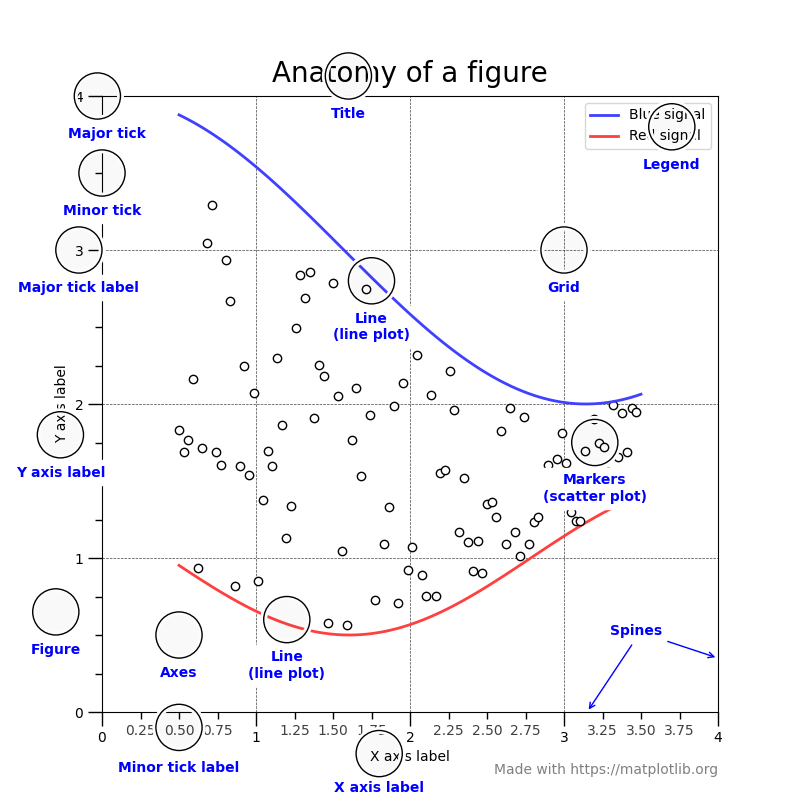


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

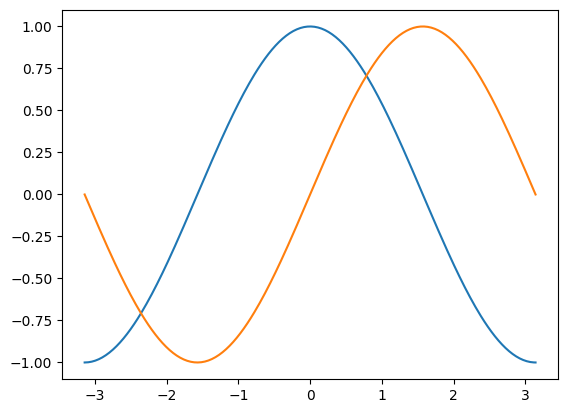

In [ ]:
#um gráfico simples deixando o matplotlib escolher os valores
plt.plot(X,C)
plt.plot(X,S)

plt.show()

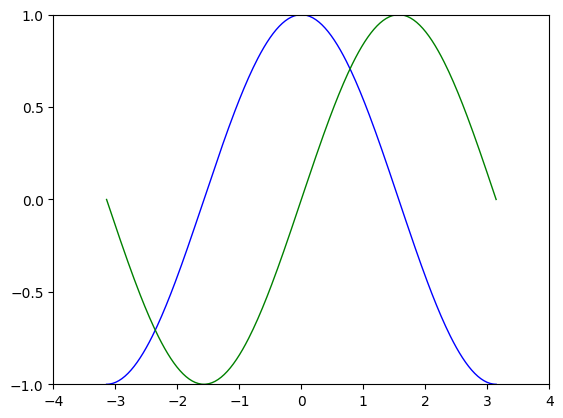

In [ ]:
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

plt.xlim(-4.0,4.0)

plt.xticks(np.linspace(-4,4,9,endpoint=True))

plt.ylim(-1.0,1.0)

plt.yticks(np.linspace(-1,1,5,endpoint=True))

plt.show()

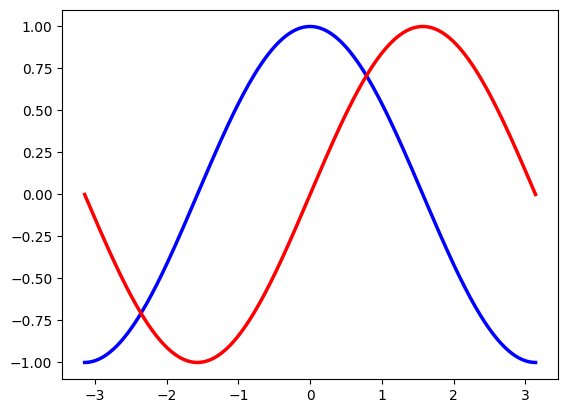

In [ ]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1,C.max()*1.1)

plt.show()

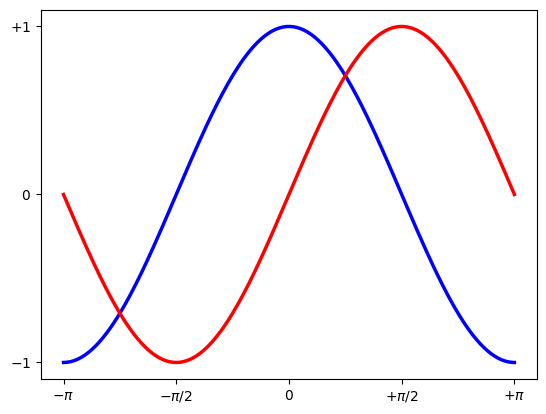

In [ ]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

plt.show()

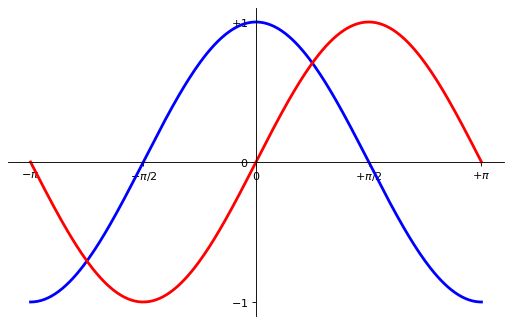

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
ax = plt.subplot(111)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")


plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


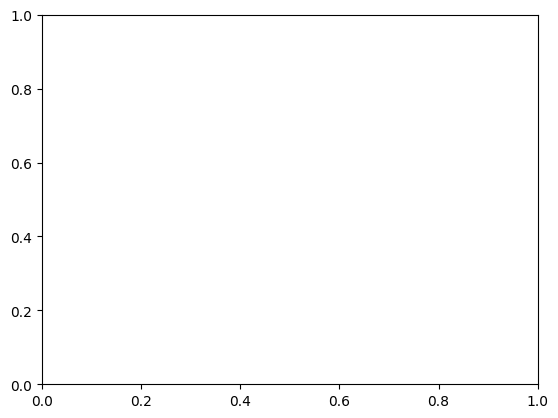

In [ ]:
plt.legend(loc='upper left', frameon=False)

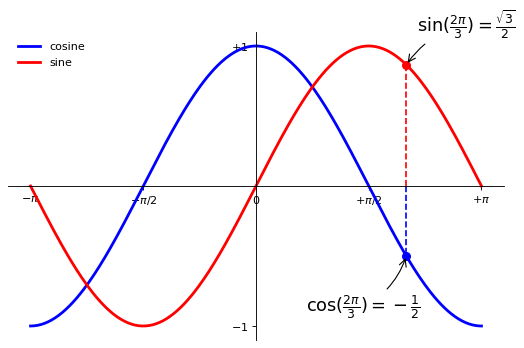

In [ ]:

plt.figure(figsize=(8,5), dpi=80)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, +1],
           [r'$-1$', r'$+1$'])

t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)],
         color ='blue',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),  xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)],
         color ='red',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),  xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(loc='upper left', frameon=False)
#plt.savefig("figura.png",dpi=72)
plt.show()

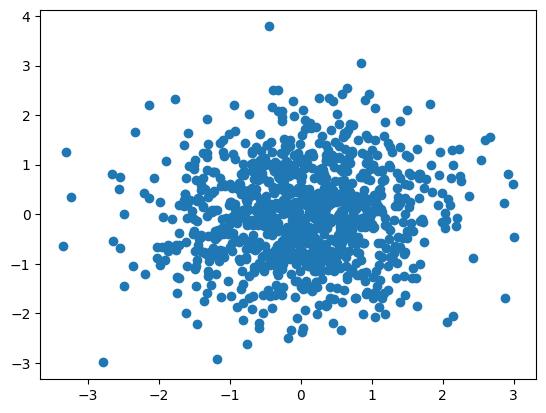

In [ ]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()

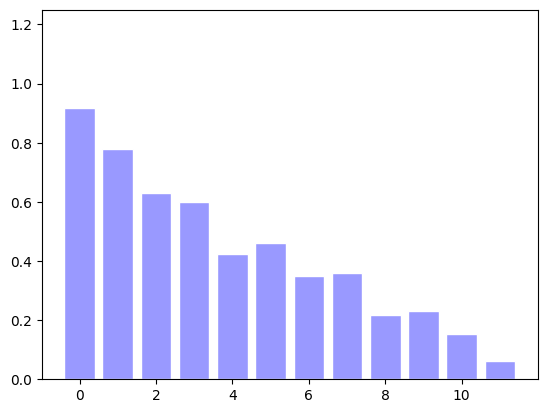

In [ ]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')

plt.ylim(0,+1.25)
plt.show()

/var/folders/zm/3bssg1p14lj63wq1qny6y2qh0000gn/T/ipykernel_4244/3936655370.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)


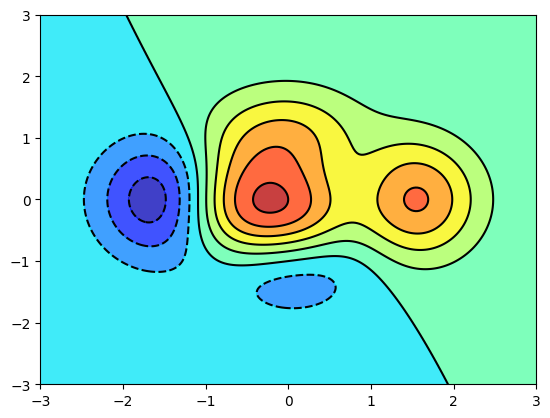

In [ ]:
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.show()

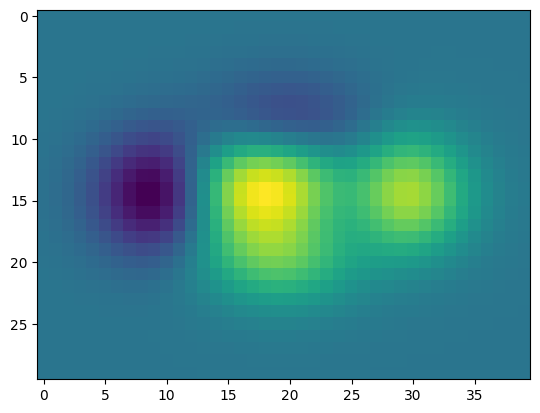

In [ ]:
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 10
x = np.linspace(-3,3,4*n)
y = np.linspace(-3,3,3*n)
X,Y = np.meshgrid(x,y)
plt.imshow(f(X,Y))
plt.show()

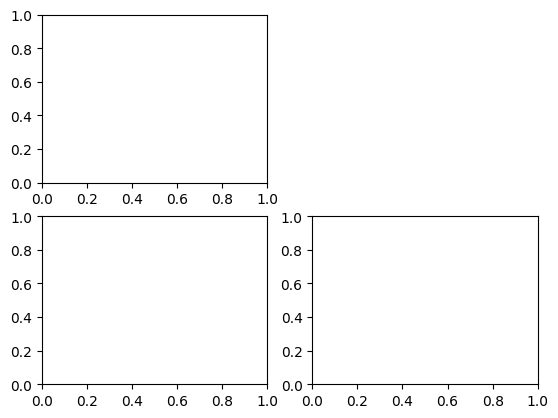

In [ ]:
plt.subplot(2,2,1)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

plt.show()

## Heat Map

{'whiskers': [<matplotlib.lines.Line2D at 0x14bd11270>,
 'caps': [<matplotlib.lines.Line2D at 0x14bd117b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14bd11030>],
 'medians': [<matplotlib.lines.Line2D at 0x14bd11cf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14bd11f90>],
 'means': []}

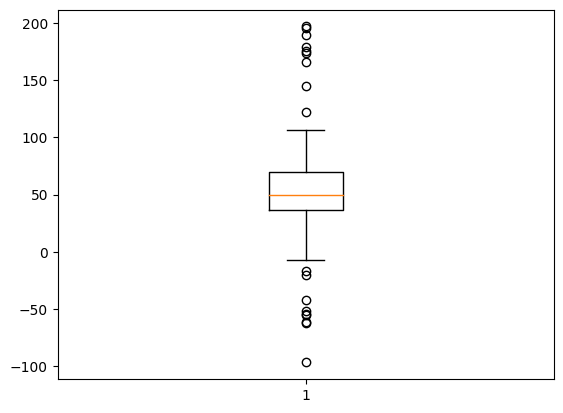

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

plt.boxplot(data)

(array([ 1.,  6.,  2., 10., 36., 23.,  8.,  1.,  2.,  6.]),
 array([-96.67564247, -67.32106622, -37.96648996,  -8.61191371,
         20.74266255,  50.0972388 ,  79.45181505, 108.80639131,
        138.16096756, 167.51554382, 196.87012007]),
 <BarContainer object of 10 artists>)

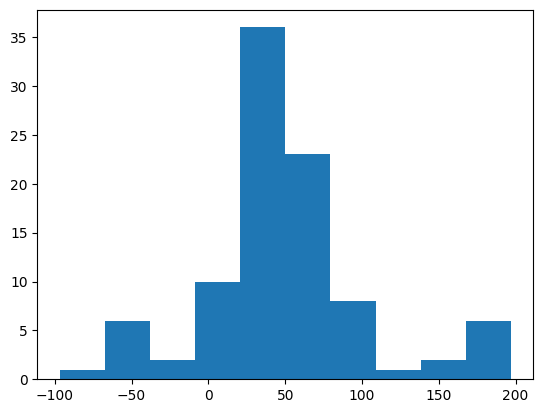

In [ ]:
plt.hist(data)

# Atividade Prática

**4 Grupos**

- Grupo 1 - Iris Dataset ([link](https://archive.ics.uci.edu/dataset/53/iris))
- Grupo 2 - Breast Cancer Dataset ([link](https://archive.ics.uci.edu/dataset/14/breast+cancer))
- Grupo 3 - Wine Dataset ([link](https://archive.ics.uci.edu/dataset/109/wine))
- Grupo 4 - Diabetes Dataset ([link](https://archive.ics.uci.edu/dataset/34/diabetes))

No fim da aula os grupos vão apresentar os resultados obtidos :D

- Grupo 1 - Iris Dataset ([link](https://archive.ics.uci.edu/dataset/53/iris))
- Grupo 2 - Breast Cancer Dataset ([link](https://archive.ics.uci.edu/dataset/14/breast+cancer))
- Grupo 3 - Wine Dataset ([link](https://archive.ics.uci.edu/dataset/109/wine))
- Grupo 4 - Diabetes Dataset ([link](https://archive.ics.uci.edu/dataset/34/diabetes))
- Verificar tipos de coluna e corrigir eventuais erros (principalmente números vs string e string vs data)
 - Estatísticas básicas (.info() .describe())
 - Tratar registros nulos (pelo menos duas técnicas diferentes)
 - Tratar duplicatas
 - Fazer plots para tentar entender o dataset

In [28]:
df = pd.read_csv('./Iris.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
